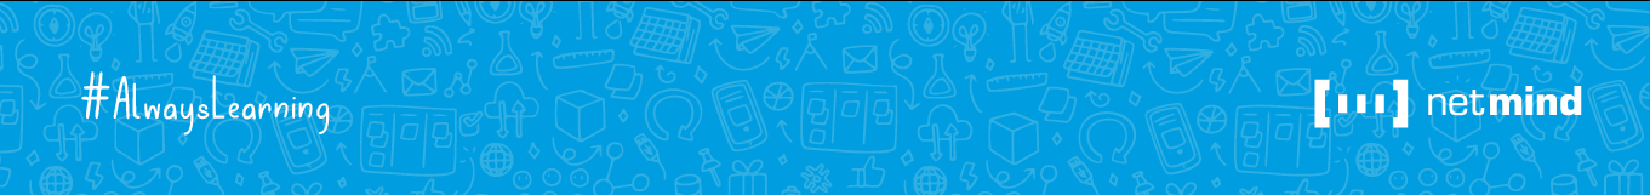
# **Definir y ejecutar pipelines**

En un proceso de ciencia de datos empresarial, querremos separar el proceso global en tareas individuales. 
- Se pueden agrupar tareas como pipeliens. 
- Estas son clave para implementar una solución eficaz de operaciones de aprendizaje automático (MLOps) en Azure.


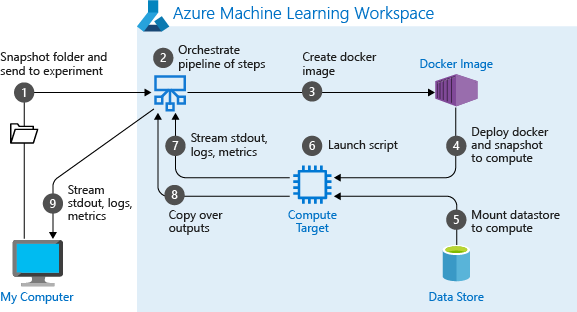


- [Azure ML Pipelines Documentation](https://learn.microsoft.com/en-us/azure/machine-learning/concept-ml-pipelines)

- https://learn.microsoft.com/en-us/azure/machine-learning/how-to-create-machine-learning-pipelines?view=azureml-api-1
- https://learn.microsoft.com/en-us/python/api/azure-ai-ml/azure.ai.ml.entities.pipelinejob?view=azure-python


## **Diseño de Pipelines**  

### **Definición de Pasos**
Cada paso en un pipeline debe estar claramente definido y debe cumplir con un propósito específico.

#### Tipos de Pasos Comunes
- **Ingesta de Datos:** Descargar datos desde Blob Storage, SQL Database o APIs RESTful.
- **Preprocesamiento:** Limpieza, normalización y transformación de datos.
- **Entrenamiento:** Entrenar modelos utilizando frameworks como Scikit-learn, TensorFlow o PyTorch.
- **Evaluación:** Validar el modelo utilizando métricas clave.
- **Despliegue:** Exponer el modelo como un servicio web.

## **Implementación usando `@pipeline`**

En Azure ML se puede definir pipelines de manera programática utilizando el decorador `@pipeline`. Este enfoque simplifica la creación de pipelines al permitirte encapsular lógica compleja en una función decorada, lo que facilita la reutilización y organización del código.

### Ventajas de Usar @pipeline
- *Modularidad*: Facilita la creación de pipelines modulares y reutilizables.
- *Declarativo*: Define flujos de trabajo de manera clara y estructurada.
- *Reutilización*: Los componentes pueden reutilizarse en diferentes pipelines.
- *Escalabilidad*: Permite gestionar pipelines complejos con múltiples pasos de manera eficiente.

### Definir el Pipeline con @pipeline
Usa el decorador @pipeline para definir el flujo de trabajo del pipeline. Dentro de la función decorada, conecta los componentes mediante sus entradas y salidas.

In [ ]:
@pipeline()
def mi_pipeline(raw_data):
    # Paso 1: Preprocesamiento de datos
    preprocessed_data = preprocess_component(raw_data=raw_data)

    # Paso 2: Entrenamiento del modelo
    trained_model = train_component(training_data=preprocessed_data.outputs.processed_data)

    # Retornar las salidas del pipeline
    return {
        "modelo_entrenado": trained_model.outputs.model,
    }

## **Ejecución de un job de pipeline**

Una pipeline se define en un archivo **YAML**, que también se puede crear mediante la función `@pipeline()`. 

Para enviar el trabajo de canalización:

In [ ]:
# submit job to workspace
pipeline_job = ml_client.jobs.create_or_update(
    pipeline_job, experiment_name="pipeline_job"
)

Después de usar la función, se puede editar las configuraciones de pipeline especificando qué parámetros desea cambiar y el nuevo valor.
Por ejemplo, puede que desee cambiar el modo de salida para las salidas del job:

In [ ]:
# change the output mode
pipeline_job.outputs.pipeline_job_transformed_data.mode = "upload"
pipeline_job.outputs.pipeline_job_trained_model.mode = "upload"

También se puede cambiar el almacén de datos predeterminado a donde se almacenarán todas las salidas:

In [ ]:
# set pipeline level datastore
pipeline_job.settings.default_datastore = "workspaceblobstore"

Para revisar la configuración de la canalización, imprimir el objeto de trabajo de canalización:

In [ ]:
print(pipeline_job)

## **Programar un job**

Para programar un job de pipeline, usar la clase `JobSchedule` para asociar una programación a un job de pipeline.

Existen varias maneras de crear una programación. Un enfoque sencillo consiste en crear una programación basada en el tiempo mediante la clase `RecurrenceTrigger` con los parámetros siguientes:

- `frequency`: unidad de tiempo para describir la frecuencia con la que se desencadena la programación. El valor puede ser minute, hour, day, week o month.
- `interval`: número de unidades de frecuencia para describir la frecuencia con la que se desencadena la programación. El valor debe ser un entero.


In [ ]:
from azure.ai.ml.entities import RecurrenceTrigger

schedule_name = "run_every_minute"

recurrence_trigger = RecurrenceTrigger(
    frequency="minute",
    interval=1,
)

pipeline_job para representar la canalización que ha compilado:

In [ ]:
from azure.ai.ml.entities import JobSchedule

job_schedule = JobSchedule(
    name=schedule_name, trigger=recurrence_trigger, create_job=pipeline_job
)

job_schedule = ml_client.schedules.begin_create_or_update(
    schedule=job_schedule
).result()

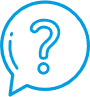
## **¿Preguntas?**

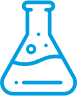
## **Lab 5**

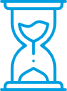
## **Ejercicio**

Usando el dataset de precios de casas (data/house_price/data.csv):
- Define un pipeline que permita los siguientes pasos: Ingesta de Datos, Preprocesamiento, Entrenamiento y Evaluación de un modelo.
- Usa Lasso